# Decision Tree
- Decision tree analysis is a predictive modelling tool that can be applied across many areas.
- Decision trees are created by algorithmic approach.
- It can split the dataset in different ways by applying different conditions.
- Decision trees are the most poerful algorithms.
- They fall under the category of supervised learning algorithms.
- Decision trees can be used for both classification and regression tasks.
- The 2 main entities of a tree are decision nodes where the data is split and leaves.


- Let us take a simple example to predict if the person is a tall person or a short person.
- The person is entering. If the height of a person is more than 6 ft., he is a tall person and if the height is less than 6 ft., he is a short person.

- In a decision tree, the questions are the decision nodes and the final outcomes are the leaves.

There are 2 types of decision trees.<br>
***Classification Decision tree:*** In this kind of decision tree, the decision variable is categorical.<br>
***Regression Decision tree:*** In this kind of decision tree, the decision variable is continuous.

### Implementing Decision Tree Algorithm
- ***Gini Index:*** It is the name of the cost function that is used to evaluate the binary splits in the dataset.
- It works with the categorical target variable success or failure.
- When the value of gini index value is higher, the homogenity is failure.
- A good gini index value is 0 and worst gini index value is 0.5(for 2 class) problem.
- Gini index for a split can be calculated with the help of following steps:
    - First, calculate the gini index for the subnodes by using the formula p^2 +p^2
    - It is the sumo of square of probability for success and failure
    - Calculate the gini index of the split using the weighted gini score of each node of that split
    - Classification and Regression Tree(CART) algorithm use gini methods to create binary splits.
    

***Split Creation:*** A split is nothing but including an attribute in the dataset and the value.
- A split can be created in the dataset with the help of following 3 parts.
    - ***Part 1: Calculating Gini Score***
    - ***Part 2: Splitting a Dataset:*** It is nothing but splitting the dataset into 2 lists of rows having index of the attribute and split value of the attribute. The 2 groups - right and left from the dataset are being collected. The value of a split can be calculated by finding the Gini score. Split value will reside in which group the attribute will reside.
    - ***Part 3: Evaluating all Splits:*** After finding gini score and splitting dataset, we need to evaluate all the splits. We must check every value associated with each attribute as a candidate split. One should find the best possible split by evaluating the cost of the split. The best split will be used as a node in the decision tree.

# Android Malware Detection using Decision Tree Algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('android_malware.csv', sep=";")

In [3]:
data

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(398, 331)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
data.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='type', ylabel='count'>

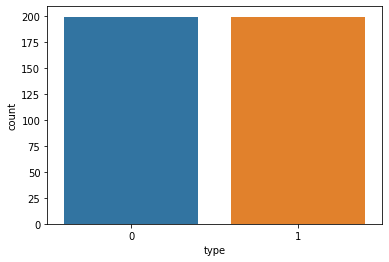

In [7]:
sns.countplot(x='type', data=data)

In [8]:
target_count = data.type.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 199
Class 1: 199


In [9]:
count_class_0, count_class_1 = data.type.value_counts()

In [10]:
df_class_0 = data[data['type'] == 0]
df_class_1 = data[data['type'] == 1]

In [11]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [12]:
df_test_over.shape

(398, 331)

<AxesSubplot:xlabel='type', ylabel='count'>

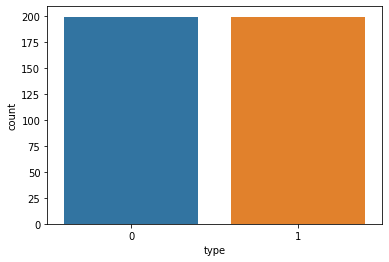

In [13]:
sns.countplot(x='type', data=df_test_over)

In [14]:
x = df_test_over.iloc[:, df_test_over.columns != 'type']
y = df_test_over.iloc[:, df_test_over.columns == 'type']

In [15]:
x.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y.head()

,type
1,0
5,0
6,0
8,0
9,0


In [17]:
x, y = shuffle(x, y)

In [18]:
x.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [20]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.nlargest(10, 'Score')

,Specs,Score
190,android.permission.READ_PHONE_STATE,128.766355
195,android.permission.READ_SMS,116.484848
277,android.permission.WRITE_SMS,103.037383
26,android.permission.ACCESS_WIFI_STATE,76.445087
9,android.permission.ACCESS_COARSE_LOCATION,58.500000
225,android.permission.SEND_SMS,55.537313
208,android.permission.RECEIVE_SMS,51.428571
134,android.permission.INSTALL_PACKAGES,51.072727
266,android.permission.WRITE_APN_SETTINGS,48.076923
76,android.permission.CALL_PHONE,47.032258


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.73951319e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19827719e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24375540e-02 1.79573011e-03
 0.00000000e+00 0.00000000e+00 3.94648642e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.00754445e-02 8.35100086e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.06284652e-03
 0.00000000e+00 7.51335031e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.82471029e-03
 1.90075831e-03 0.000000

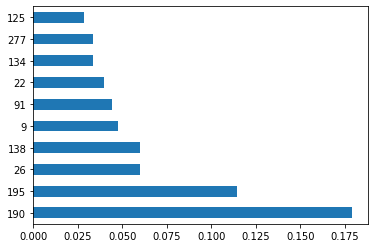

In [21]:
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
x_train.shape

(278, 330)

In [24]:
x_train.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y_train.head()

,type
101,0
297,0
321,0
182,1
95,0


In [26]:
support = svm.LinearSVC(random_state=20)

In [27]:
support.fit(x_train, y_train)

LinearSVC(random_state=20)

In [28]:
y_pred = support.predict(x_test)

In [29]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [30]:
model1 = metrics.accuracy_score(y_test, y_pred)
print(model1)

0.95


In [31]:
cnf_matrix = confusion_matrix(y_test, y_pred)

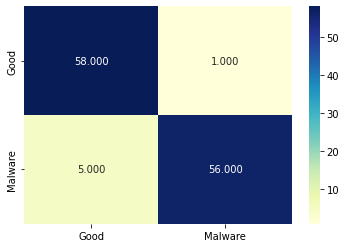

In [32]:
labels = ['Good', 'Malware']
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [33]:
tree = DecisionTreeClassifier()

In [34]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = tree.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [36]:
model2 = metrics.accuracy_score(y_test, y_pred)
print(model2)

0.9166666666666666


In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred)

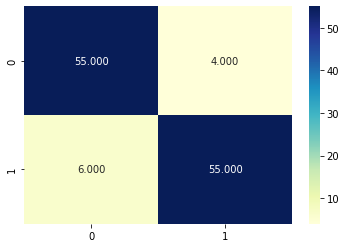

In [38]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()